In [24]:
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

In [25]:
producers = nx.read_gml("./networks/producers_network.gml")
themes = nx.read_gml("./networks/themes_network.gml")

In [26]:
C_b_p = nx.betweenness_centrality(producers)
C_c_p = nx.closeness_centrality(producers)
C_d_p = nx.degree_centrality(producers)
clustering_p = nx.clustering(producers)
C_b_t = nx.betweenness_centrality(themes)
C_c_t = nx.closeness_centrality(themes)
C_d_t = nx.degree_centrality(themes)
clustering_t = nx.clustering(themes)

In [27]:
animes = pd.read_csv("Anime.csv")
animes.dropna(subset=["Score"], inplace=True)
animes = animes.assign(Producers=animes["Producers"].str.split(", ")).explode("Producers")
animes = animes.assign(Themes=animes["Themes"].str.split(", ")).explode("Themes")
animes = animes[
    (animes["Producers"]!="Unknown") & 
    (animes["Producers"]!="Ltd.")
    ]
animes = animes[animes["Themes"]!="Unknown"]
animes = animes.reset_index().drop(columns=["index"])
animes.head()

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013",...,Gore,Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013",...,Military,Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
2,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013",...,Survival,Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
3,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013",...,Gore,Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
4,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013",...,Military,Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695


In [28]:
data = animes[["ID", "Title", "Producers", "Themes", "Score"]].copy()
data[
    ["Producers_closeness_centrality",
    "Producers_betweenness_centrality",
    "Producers_degree_centrality",
    "Producers_clustering_coefficient",
    "Themes_closeness_centrality",
    "Themes_betweenness_centrality",
    "Themes_degree_centrality",
    "Themes_clustering_coefficient"]] = np.nan
for i in range(len(data)):
    producer = data.loc[i,"Producers"]
    theme = data.loc[i,"Themes"]
    data.loc[i,"Producers_closeness_centrality"] = C_c_p[producer]
    data.loc[i,"Producers_betweenness_centrality"] = C_b_p[producer]
    data.loc[i,"Producers_degree_centrality"] = C_d_p[producer]
    data.loc[i,"Producers_clustering_coefficient"] = clustering_p[producer]
    data.loc[i,"Themes_closeness_centrality"] = C_c_t[theme]
    data.loc[i,"Themes_betweenness_centrality"] = C_b_t[theme]
    data.loc[i,"Themes_degree_centrality"] = C_d_t[theme]
    data.loc[i,"Themes_clustering_coefficient"] = clustering_t[theme]
data.head()

,Title,Producers,Themes,Score,Producers_closeness_centrality,Producers_betweenness_centrality,Producers_degree_centrality,Producers_clustering_coefficient,Themes_closeness_centrality,Themes_betweenness_centrality,Themes_degree_centrality,Themes_clustering_coefficient
0,Shingeki no Kyojin,Production I.G,Gore,8.531,0.363724,0.004022,0.058783,0.324487,0.636364,0.007484,0.428571,0.661905
1,Shingeki no Kyojin,Production I.G,Military,8.531,0.363724,0.004022,0.058783,0.324487,0.720588,0.018642,0.612245,0.597701
2,Shingeki no Kyojin,Production I.G,Survival,8.531,0.363724,0.004022,0.058783,0.324487,0.569767,0.001482,0.244898,0.757576
3,Shingeki no Kyojin,Dentsu,Gore,8.531,0.415496,0.024174,0.181135,0.151915,0.636364,0.007484,0.428571,0.661905
4,Shingeki no Kyojin,Dentsu,Military,8.531,0.415496,0.024174,0.181135,0.151915,0.720588,0.018642,0.612245,0.597701


In [29]:
data = data.groupby("Title").agg(np.average).reset_index()

/Users/bennycjy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


In [50]:
data

,Title,Score,Producers_closeness_centrality,Producers_betweenness_centrality,Producers_degree_centrality,Producers_clustering_coefficient,Themes_closeness_centrality,Themes_betweenness_centrality,Themes_degree_centrality,Themes_clustering_coefficient
0,.hack//G.U. Returner,6.681,0.341881,0.011134,0.072796,0.582237,0.604938,0.002628,0.346939,0.764706
1,.hack//G.U. Trilogy,7.091,0.396790,0.022269,0.142857,0.164474,0.604938,0.002628,0.346939,0.764706
2,.hack//G.U. Trilogy: Parody Mode,6.391,0.396790,0.022269,0.142857,0.164474,0.691358,0.018374,0.530612,0.637815
3,.hack//Gift,6.111,0.286971,0.000000,0.002734,1.000000,0.604938,0.002628,0.346939,0.764706
4,.hack//Liminality,6.591,0.350230,0.008594,0.070631,0.492897,0.604938,0.002628,0.346939,0.764706
...,...,...,...,...,...,...,...,...,...,...
5468,xxxHOLiC,7.991,0.367075,0.011814,0.098838,0.314507,0.765625,0.032145,0.693878,0.527629
5469,xxxHOLiC Movie: Manatsu no Yoru no Yume,7.941,0.399305,0.017542,0.141946,0.200203,0.765625,0.032145,0.693878,0.527629
5470,xxxHOLiC: Kei,8.221,0.367075,0.011814,0.098838,0.314507,0.765625,0.032145,0.693878,0.527629
5471,xxxHOLiC: Shunmuki,8.051,0.401307,0.016735,0.139440,0.202598,0.765625,0.032145,0.693878,0.527629


In [30]:
X = data[
    ["Producers_closeness_centrality",
    "Producers_betweenness_centrality",
    "Producers_degree_centrality",
    "Producers_clustering_coefficient",
    "Themes_closeness_centrality",
    "Themes_betweenness_centrality",
    "Themes_degree_centrality",
    "Themes_clustering_coefficient"]
]
y = data["Score"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Baseline: Linear Regression  
Models: LASSO, Ridge, DecisionTreeRegressor, Random Forest, Gradient Boosting Regressor, AdaBoost Regressor, XGBoost Regressor, // MLP Regressor  
Metrics: MAE

In [31]:
result = pd.DataFrame(columns=["model", "MAE"])

In [32]:
# linear
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_val)
result.loc[len(result)] = ["Linear", mean_absolute_error(y_val, y_pred)]

In [33]:
# lasso
from sklearn.linear_model import Lasso
reg = Lasso().fit(X_train, y_train)
y_pred = reg.predict(X_val)
result.loc[len(result)] = ["Lasso", mean_absolute_error(y_val, y_pred)]

In [34]:
# ridge
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1).fit(X_train, y_train)
y_pred = reg.predict(X_val)
result.loc[len(result)] = ["Ridge", mean_absolute_error(y_val, y_pred)]

In [35]:
# DecisionTree
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = reg.predict(X_val)
result.loc[len(result)] = ["DecisitionTree", mean_absolute_error(y_val, y_pred)]

In [41]:
# RF
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor().fit(X_train, y_train)
y_pred = reg.predict(X_val)
result.loc[len(result)] = ["Random Forest", mean_absolute_error(y_val, y_pred)]

<BarContainer object of 8 artists>

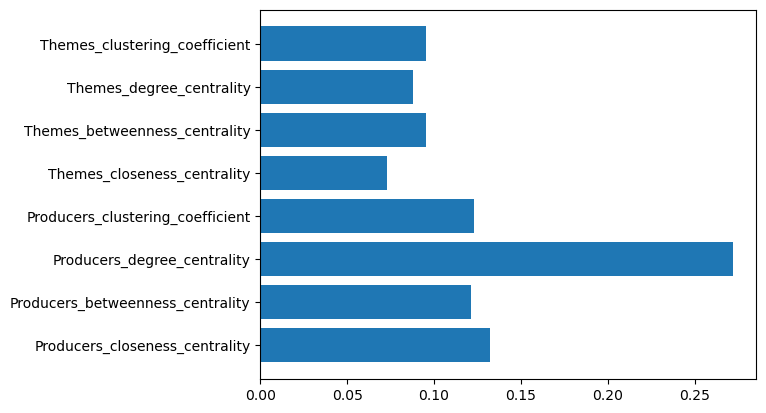

In [43]:
pyplot.barh(X_train.columns, reg.feature_importances_)

In [37]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor().fit(X_train, y_train)
y_pred = reg.predict(X_val)
result.loc[len(result)] = ["Gradient Boosting", mean_absolute_error(y_val, y_pred)]

In [38]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor
reg = AdaBoostRegressor().fit(X_train, y_train)
y_pred = reg.predict(X_val)
result.loc[len(result)] = ["AdaBoost", mean_absolute_error(y_val, y_pred)]

In [39]:
# XGBoost
import xgboost as xg
reg = xg.XGBRegressor().fit(X_train, y_train)
y_pred = reg.predict(X_val)
result.loc[len(result)] = ["XGBoost", mean_absolute_error(y_val, y_pred)]

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

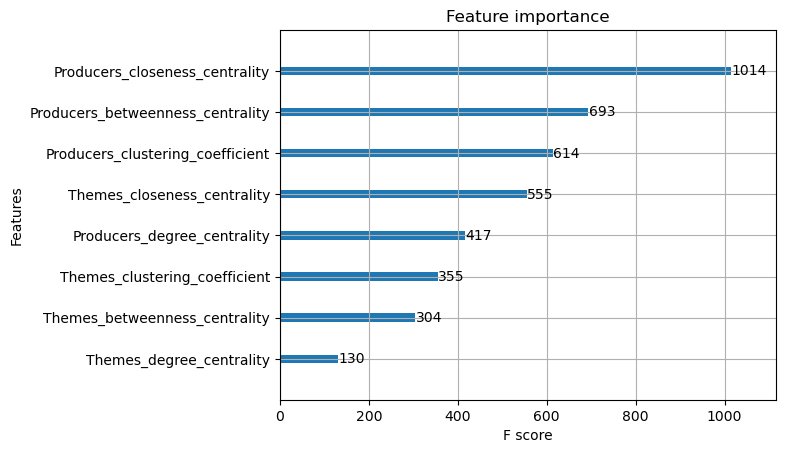

In [40]:
xg.plot_importance(reg)

In [17]:
# MLP
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor().fit(X_train, y_train)
y_pred = reg.predict(X_val)
result.loc[len(result)] = ["MLP", mean_absolute_error(y_val, y_pred)]

/Users/bennycjy/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
result.sort_values(by=["MAE"])

,model,MAE
4,Random Forest,0.544480
7,XGBoost,0.552218
5,Gradient Boosting,0.592690
6,AdaBoost,0.648321
0,Linear,0.652123
8,MLP,0.661847
2,Ridge,0.667133
3,DecisitionTree,0.697521
1,Lasso,0.738201
